- Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df= pd.read_csv('Lligues europees UEFA.csv', encoding = 'ISO-8859-1', sep=";")
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [10]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [12]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


Realitzem T-Test per valorar si acceptem la hipòtesis nul·la o alternativa.  Seleccionarem una mostra del 40% de l'atribut 'GF' (Goals For). Si el p-value > 5%, indica que la diferència observada pot ser deguda a l'atzar, per la qual cosa no es rebutja la hipòtesi nul·la. Per contra, si el p-value és menor que 5%, es considerará que hi ha evidències suficients per rebutjar que les mostres procedeixen de poblacions amb la mateixa mitjana.

In [29]:
alfa = 0.05
sample_size = round(len(df)*0.4)
popmean = df.GF.mean()

GF_sample = np.random.choice(df.GF, sample_size)
GF_sample
ttest, pvalue = stats.ttest_1samp(GF_sample, popmean)

if pvalue < alfa:
  print(f"Per un alfa de {alfa*100}% rebutgem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("La mostra NO té una mitjana igual a la població donada")
else:
  print(f"Per un alfa de {alfa*100}% acceptem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("La mostra SI té una mitjana igual a la població donada")

Per un alfa de 5.0% acceptem l'hipòtesis nul.la amb un p-value de 44.76007058060958%
La mostra SI té una mitjana igual a la població donada


Realitzem *Shapiro-Wilk* test per a valorar si la distribució és normal:

In [31]:
print('Hipotesis nul·la Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

alfa = 0.05
ttest, pvalue = stats.shapiro(df.GF)


if pvalue < alfa:
  print(f"Per un alfa de {alfa*100}% rebutgem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("La mostra NO té una distribució normal")
else:
  print(f"Per a un alfa de {alfa*100}% acceptem l'hipòtesis nul.la amb un p-value de  {pvalue*100}%")
  print("La mostra SI té una distribució normal")

Hipotesis nul·la Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per un alfa de 5.0% rebutgem l'hipòtesis nul.la amb un p-value de 0.03564787621144205%
La mostra NO té una distribució normal


<AxesSubplot: ylabel='Frequency'>

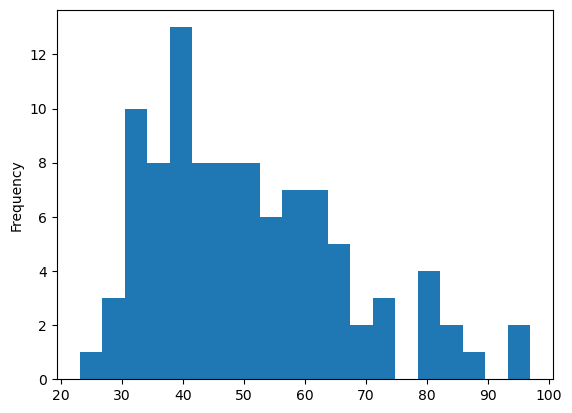

In [24]:
df['GF'].plot.hist(bins=20)

- Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Realizem un pearsonr test per a valorar si la distribució és normal. Compararem els partits perduts 'L' (Losses) vs gols en contra 'GA'(Goals Againts)

In [33]:
print('Null hypothesis Ho ->  The distributions underlying the samples are uncorrelated and normally distributed.')
print('Hipotesis alternativa H1 -> The distributions underlying the samples are correlated and no normally distributed.\n\n')

alfa = 0.05

a = df.GA
b = df.L

#ttest, pvalue = stats.ttest_rel(a, b) #Tests whether the means of two paired samples are significantly different.
ttest, pvalue = stats.pearsonr(a, b) #Tests whether two samples have a linear relationship.

if pvalue < alfa:
  print(f"Per un alfa de {alfa*100}% rebutgem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("The distributions underlying the samples are correlated and NO normally distributed.")
else:
  print(f"Per a un alfa de {alfa*100}% acceptem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("The distributions underlying the samples are UNcorrelated and normally distributed.")

Null hypothesis Ho ->  The distributions underlying the samples are uncorrelated and normally distributed.
Hipotesis alternativa H1 -> The distributions underlying the samples are correlated and no normally distributed.


Per un alfa de 5.0% rebutgem l'hipòtesis nul.la amb un p-value de 2.0267384124036904e-25%
The distributions underlying the samples are correlated and NO normally distributed.


Rebutgem l'hipòtesis nul·la, significa que els gols en contra no és aleatori. En aquest cas està influeciada directament per als partits perduts. 'GA' és dependent de 'L'.

- Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Realizarem un one-way *ANOVA test* per a valorar si comparteixen mitjana poblacional. Calcularem sobre els atributs: 'Pts'(Points per match played), 'GF' (Goals For), 'W' (Wins)

In [34]:
alfa = 0.05

puntos = df.Pts
goles = df.GF
ganados = df.W

ttest, pvalue = stats.f_oneway(puntos, goles, ganados)


if pvalue < alfa:
  print(f"Per un alfa de {alfa*100}% rebutgem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("Els atributs NO tenen una mitjana comuna")
else:
  print(f"Per a un alfa de {alfa*100}% acceptem l'hipòtesis nul.la amb un p-value de {pvalue*100}%")
  print("Els atributs SI tenen una mitjana comuna")

Per un alfa de 5.0% rebutgem l'hipòtesis nul.la amb un p-value de 2.1373590359779205e-60%
Els atributs NO tenen una mitjana comuna
